In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import pickle
import skvideo.io

In [2]:
def parse_log(log_file):
    result = {}
    vws = np.linspace(0.0, 1.0, 11)
    for vw in vws:
        vw = round(vw, 1)
        log = log_file.format(vw=vw)
        with open(log, 'r') as f:
            lines = f.readlines()
        lines = [lines[-2].strip(), lines[-1].strip()]
        lines = ' '.join(lines)
        print(lines)
        maps = lines.split('[')[1].split(']')[0].split(" ")
        maps = [float(m) for m in maps if m != '']
        result[vw] = maps
    
    # to csv
    df = pd.DataFrame(result)
    # add row mean
    df.loc['mean(mAP)'] = df.mean()
    for i in range(7):
        df = df.rename(index={i: f'tIoU={round((i+1)*0.1, 1)}'})
    return result, df

In [35]:
logs = '../outputs/eval_new1210-10epoch_{vw}.log'
result, df2 = parse_log(logs)

mAP: [28.65067645 23.48911123 17.09634984 12.24003719  6.87522164  2.50308696 0.82980656]
mAP: [45.74946298 42.72308535 33.58047093 26.60406046 19.1682955   8.63426648 3.10036357]
mAP: [61.40305163 59.64167534 52.81566652 44.29006998 34.80828277 19.16438023 7.66469346]
mAP: [72.42615674 69.34612518 64.48882485 56.3366188  46.63603848 29.79762191 12.95167896]
mAP: [76.69503903 74.31011579 69.20692568 61.35784879 52.88161974 37.71153666 18.76652246]
mAP: [78.39721706 76.08934447 70.71934872 63.33590033 55.46145766 42.1404337 22.36526515]
mAP: [79.28487962 76.68147114 71.42825655 63.75792437 57.06256092 44.98153191 24.27026205]
mAP: [79.64622168 77.37864225 71.65325419 64.10942511 57.96067909 47.3154507 26.1785103 ]
mAP: [79.79171525 77.52697025 71.63741881 63.70112638 58.01619694 48.09398515 29.05195218]
mAP: [79.72830351 77.62549263 71.77082837 63.26938551 58.51640605 47.36867464 30.99458345]
mAP: [79.99117471 77.8014817  71.82379854 63.39065502 58.62789103 47.14340526 32.83067508]


In [17]:
def plot_curve(df, title):
    # plot mean mAP curve
    plt.plot(df.columns, df.loc['mean(mAP)'])
    plt.xlabel('Visual Branch Weight')
    plt.ylabel('mean mAP')
    plt.title('mean mAP curve')
    # show digit (round to 2)
    plt.show()

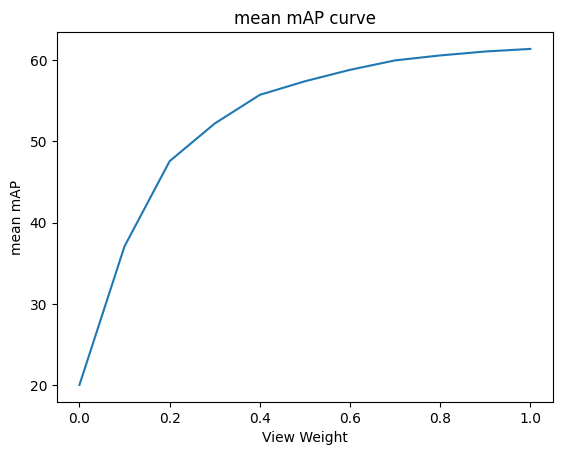

In [31]:
plot_curve(df, 'mean mAP curve')

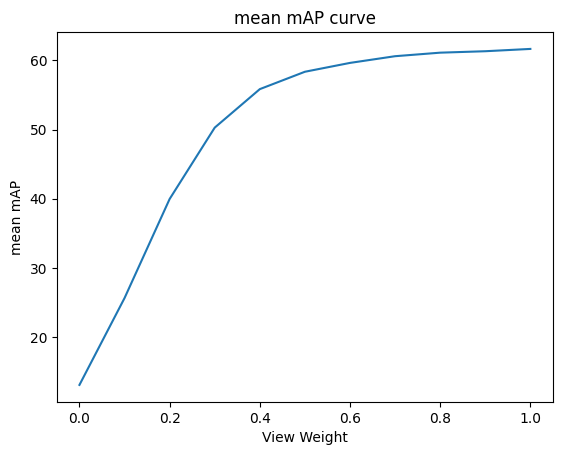

In [37]:
plot_curve(df2, 'mean mAP curve')

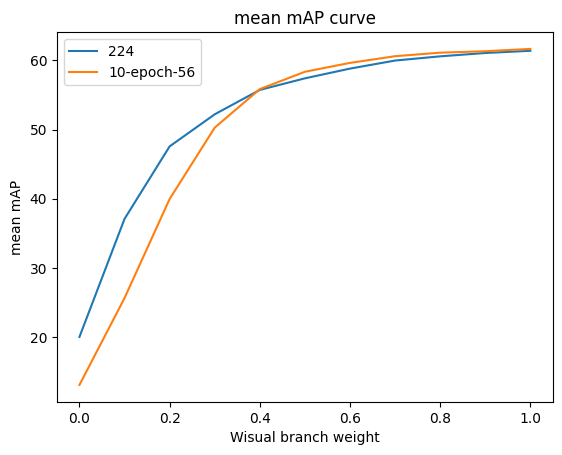

In [39]:
# plot 2 curves in one figure
plt.plot(df.columns, df.loc['mean(mAP)'], label='224')
plt.plot(df2.columns, df2.loc['mean(mAP)'], label='10-epoch-56')
plt.xlabel('Wisual branch weight')
plt.ylabel('mean mAP')
plt.title('mean mAP curve')
plt.legend()
plt.show()


mAP: [65.01845068 62.1365768  57.40622504 49.95946596 41.05935811 30.34705115 16.78622615]
mAP: [69.24188737 66.7066941  62.70042806 54.9610093  45.99466952 34.39315341 19.90267156]
mAP: [73.08239509 70.63159127 66.09434501 58.65546342 50.09906455 38.38943221 21.8496471 ]
mAP: [75.82916339 73.62491947 68.33592525 61.58305739 53.43605979 41.56688845 23.92307272]
mAP: [77.59851559 75.45916352 70.02397071 63.14449409 55.51387032 44.71844386 27.0887871 ]
mAP: [78.97751434 76.87403672 71.66128518 64.43586954 56.50890806 46.89378346 28.25833794]
mAP: [79.65062703 77.35241152 72.2982058  64.72379744 57.20090853 47.84733466 29.15244452]
mAP: [79.69453404 77.49800963 72.31303179 64.72476058 57.66930577 48.14617382 30.88796291]
mAP: [79.89539209 78.15750282 72.60360632 64.20636735 57.84234805 47.82583467 31.57844953]
mAP: [79.42889121 77.81520839 71.62021811 63.6942857  57.40172557 46.87748142 31.33040628]
mAP: [79.29722815 76.97555164 70.97102312 63.51821476 57.190484   45.79553512 31.17112513]

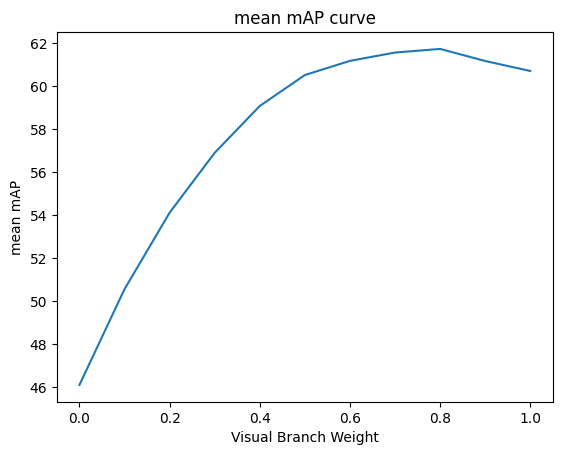

In [18]:
log_oldfeat = '../outputs/eval_oldfeat_{vw}.log'
_, df_old = parse_log(log_oldfeat)
plot_curve(df_old, 'mean mAP curve') 

In [16]:
df_old

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
tIoU=0.1,65.018451,69.241887,73.082395,75.829163,77.598516,78.977514,79.650627,79.694534,79.895392,79.428891,79.297228
tIoU=0.2,62.136577,66.706694,70.631591,73.624919,75.459164,76.874037,77.352412,77.498010,78.157503,77.815208,76.975552
tIoU=0.3,57.406225,62.700428,66.094345,68.335925,70.023971,71.661285,72.298206,72.313032,72.603606,71.620218,70.971023
tIoU=0.4,49.959466,54.961009,58.655463,61.583057,63.144494,64.435870,64.723797,64.724761,64.206367,63.694286,63.518215
tIoU=0.5,41.059358,45.994670,50.099065,53.436060,55.513870,56.508908,57.200909,57.669306,57.842348,57.401726,57.190484
tIoU=0.6,30.347051,34.393153,38.389432,41.566888,44.718444,46.893783,47.847335,48.146174,47.825835,46.877481,45.795535
tIoU=0.7,16.786226,19.902672,21.849647,23.923073,27.088787,28.258338,29.152445,30.887963,31.578450,31.330406,31.171125
mean(mAP),46.101908,50.557216,54.114563,56.899869,59.078178,60.515676,61.175104,61.561968,61.729929,61.166888,60.702737
